In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\karth\OneDrive\Desktop\creditcard.csv')

# Explore the structure of the dataset
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
#info and discription
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Check for missing values
print(df.isnull().sum())

# Since the dataset typically does not contain missing values, but if there are, we could drop or impute them.
df = df.dropna()  # Drop missing values

# Confirm no missing values remain
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


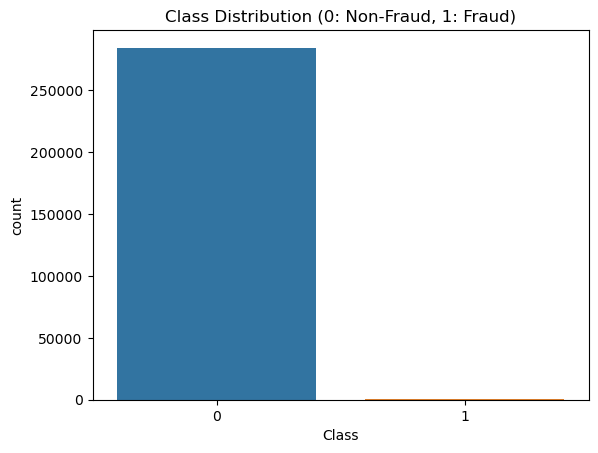

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [5]:
#Visualize the distribution of classes (fraudulent vs. non-fraudulent transactions).
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

# Alternatively, show the percentage of fraudulent transactions
fraud_percentage = df['Class'].value_counts(normalize=True) * 100
print(fraud_percentage)


In [6]:
#Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
#Train a baseline model using Logistic Regression without addressing the class imbalance.
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [8]:
#Evaluate the model using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9992099996488887
Precision: 0.8192771084337349
Recall: 0.6938775510204082
F1-Score: 0.7513812154696133
ROC-AUC: 0.8468068818692361
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.69      0.75        98

    accuracy                           1.00     56962
   macro avg       0.91      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
#Handling Class Imbalance

In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(pd.Series(y_train_smote).value_counts())


Class
0    227451
1    227451
Name: count, dtype: int64


In [10]:
# Train the Logistic Regression model on the balanced dataset
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)


LogisticRegression(max_iter=1000)

In [11]:
#Evaluate the model and compare the results with the baseline model.
# Make predictions
y_pred_smote = log_reg_smote.predict(X_test)

# Evaluate the model
print(f"Accuracy (SMOTE): {accuracy_score(y_test, y_pred_smote)}")
print(f"Precision (SMOTE): {precision_score(y_test, y_pred_smote)}")
print(f"Recall (SMOTE): {recall_score(y_test, y_pred_smote)}")
print(f"F1-Score (SMOTE): {f1_score(y_test, y_pred_smote)}")
print(f"ROC-AUC (SMOTE): {roc_auc_score(y_test, y_pred_smote)}")
print(classification_report(y_test, y_pred_smote))


Accuracy (SMOTE): 0.9774937677750078
Precision (SMOTE): 0.06534508076358296
Recall (SMOTE): 0.9081632653061225
F1-Score (SMOTE): 0.12191780821917808
ROC-AUC (SMOTE): 0.9428882589895834
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
#Advanced Techniques and Final Evaluation
#Apply a combination of oversampling and undersampling techniques to further balance the classes.
from imblearn.combine import SMOTEENN

# Apply SMOTEENN to balance the dataset
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

# Check the new class distribution
print(pd.Series(y_train_smoteenn).value_counts())
print("hello")


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smoteenn, y_train_smoteenn)

In [ ]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print(f"Accuracy (RF): {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision (RF): {precision_score(y_test, y_pred_rf)}")
print(f"Recall (RF): {recall_score(y_test, y_pred_rf)}")
print(f"F1-Score (RF): {f1_score(y_test, y_pred_rf)}")
print(f"ROC-AUC (RF): {roc_auc_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))


In [ ]:
## Summary of Findings

### Baseline Model (Logistic Regression without balancing)

Accuracy: 0.9992099996488887
Precision: 0.8192771084337349
Recall: 0.6938775510204082
F1-Score: 0.7513812154696133
ROC-AUC: 0.8468068818692361

### Model with SMOTE (Logistic Regression)

Accuracy (SMOTE): 0.9774937677750078
Precision (SMOTE): 0.06534508076358296
Recall (SMOTE): 0.9081632653061225
F1-Score (SMOTE): 0.12191780821917808
ROC-AUC (SMOTE): 0.9428882589895834

### Model with SMOTEENN (Random Forest)
Accuracy (SMOTE): 0.9774937677750078
Precision (SMOTE): 0.06534508076358296
Recall (SMOTE): 0.9081632653061225
F1-Score (SMOTE): 0.12191780821917808
ROC-AUC (SMOTE): 0.9428882589895834



